# Emotion Detection of audio files


## MFCC feature extraction for TESS and storing it in a dataframe

In [1]:
import pandas as pd 
import numpy as np 
import os
import librosa
import librosa.feature

def extract_feature(file_name, mfcc, chroma, mel): # function to extract the features
    X, sample_rate = librosa.load(os.path.join(file_name), res_type='kaiser_fast') # load the audio file
    if chroma: # if the chroma is true
        stft=np.abs(librosa.stft(X)) # compute the STFT
    result=np.array([]) # create an empty array
    if mfcc: # if the mfcc is true
        mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0) # compute the MFCCs
        result=np.hstack((result, mfccs)) # concatenate the MFCCs
    if chroma: # if the chroma is true
        chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0) # compute the chroma features
        result=np.hstack((result, chroma)) # concatenate the chroma features
    if mel: # if the mel is true
        mel=np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T,axis=0) # compute the mel features
        result=np.hstack((result, mel)) # concatenate the mel features
    return result # return the result

In [2]:
import os # import the necessary modules
path='TESS Toronto emotional speech set data\\' # set the path
df=pd.DataFrame(columns=[f'feature {i}' for i in range(0,180)]) # create a dataframe with the columns
for file in os.listdir(path): # for each file in the path
    for filename in os.listdir(path+file): # for each file in the path
        f=path+file+"\\"+filename # set the file path
        feature=extract_feature(f, True, True, True) # extract the features
        feature=feature.reshape(1, -1) # reshape the feature 
        df_temp=pd.DataFrame(feature,columns=[f'feature {i}' for i in range(len(feature[0]))]) # create a dataframe with the features
        df_temp['label'] = f.split('_')[-1].split('.')[0] # set the label
        df=pd.concat([df, df_temp]) # concatenate the dataframe
df.to_excel('data.xlsx', index=False) # save the dataframe to an excel file

C:\Users\reube\AppData\Local\Temp\ipykernel_10500\1019741924.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df=pd.concat([df, df_temp]) # concatenate the dataframe


## Data visualizatiom

In [3]:
print(df['label'].value_counts()) # print the label counts

label
angry      400
disgust    400
fear       400
happy      400
neutral    400
ps         400
sad        400
Name: count, dtype: int64


In [4]:
df.describe() # print the description of the dataframe

,feature 0,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,feature 9,...,feature 170,feature 171,feature 172,feature 173,feature 174,feature 175,feature 176,feature 177,feature 178,feature 179
count,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,...,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2.800000e+03,2.800000e+03,2.800000e+03,2.800000e+03
mean,-411.525141,65.581409,0.178824,15.142113,-8.816716,6.643732,-13.813887,-3.221907,-14.989697,3.708326,...,0.004770,0.005607,0.006200,0.005291,0.002296,0.000606,1.985001e-04,4.612214e-05,5.667092e-06,2.417871e-07
std,67.109508,21.870460,15.949049,15.472712,11.839655,6.737116,6.382787,7.782298,6.706832,5.430482,...,0.007758,0.009691,0.011016,0.009381,0.003980,0.001044,3.698983e-04,8.930040e-05,1.072440e-05,4.563485e-07
min,-586.072998,2.567806,-41.981724,-32.606274,-51.040092,-13.458231,-34.075569,-26.900883,-33.119095,-15.104726,...,0.000024,0.000011,0.000007,0.000006,0.000002,0.000002,5.746987e-07,9.329904e-08,5.738560e-09,1.653612e-10
25%,-451.942329,48.628240,-12.840190,2.908991,-16.379322,1.857030,-17.926962,-9.005314,-20.098296,-0.008007,...,0.000420,0.000409,0.000339,0.000239,0.000121,0.000048,1.305714e-05,2.012815e-06,1.528520e-07,4.733771e-09
50%,-412.197159,68.049370,-0.321068,15.065359,-8.383507,6.394338,-13.489487,-3.492598,-15.872509,3.580363,...,0.001601,0.001575,0.001504,0.001105,0.000484,0.000160,4.752819e-05,8.534173e-06,7.340840e-07,2.453658e-08
75%,-363.086548,82.365107,13.182945,26.068197,-1.164526,11.543325,-9.264538,3.188000,-10.125093,7.570410,...,0.005918,0.006715,0.007228,0.006215,0.003008,0.000729,2.177851e-04,4.886522e-05,5.955801e-06,2.695836e-07
max,-239.003067,124.084091,40.910011,57.381794,21.440029,26.130383,6.696121,14.372293,5.638602,20.052330,...,0.088348,0.132285,0.126417,0.111328,0.046148,0.011966,3.921513e-03,8.855814e-04,1.025326e-04,5.574802e-06


## Splitting the data into training and testing sets

In [5]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(df.drop('label', axis=1), df['label'], test_size=0.1, random_state=42)




## Random Forest Classification

In [6]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
RFmodel = RandomForestClassifier(n_estimators=100, random_state=42)
RFmodel.fit(train_x, train_y)
pred = RFmodel.predict(test_x)
print(classification_report(test_y, pred))
RFaccuracy = accuracy_score(test_y, pred)
print(RFaccuracy)
import joblib
# Save the trained model
joblib.dump(RFmodel, 'model_filename.pkl')

              precision    recall  f1-score   support

       angry       1.00      1.00      1.00        42
     disgust       1.00      1.00      1.00        30
        fear       1.00      1.00      1.00        38
       happy       1.00      0.97      0.99        39
     neutral       1.00      1.00      1.00        41
          ps       0.98      1.00      0.99        44
         sad       1.00      1.00      1.00        46

    accuracy                           1.00       280
   macro avg       1.00      1.00      1.00       280
weighted avg       1.00      1.00      1.00       280

0.9964285714285714


['model_filename.pkl']

Confusion Matrix:
[[42  0  0  0  0  0  0]
 [ 0 30  0  0  0  0  0]
 [ 0  0 38  0  0  0  0]
 [ 0  0  0 38  0  1  0]
 [ 0  0  0  0 41  0  0]
 [ 0  0  0  0  0 44  0]
 [ 0  0  0  0  0  0 46]]


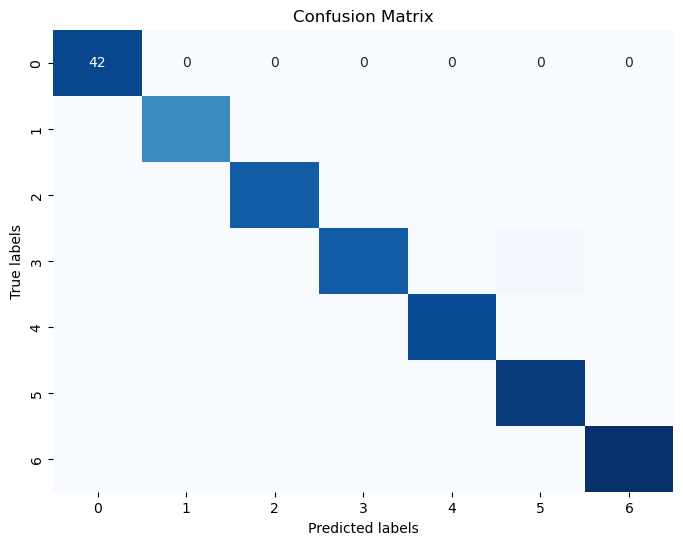

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrix
conf_matrix = confusion_matrix(test_y, pred)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

## Decision Tree Classification

In [8]:
#import decision tree
from sklearn.tree import DecisionTreeClassifier
DTmodel = DecisionTreeClassifier(random_state=42)
DTmodel.fit(train_x, train_y)
pred = DTmodel.predict(test_x)
print(classification_report(test_y, pred))
DFaccuracy = accuracy_score(test_y, pred)

              precision    recall  f1-score   support

       angry       0.97      0.76      0.85        42
     disgust       0.90      0.90      0.90        30
        fear       0.97      0.95      0.96        38
       happy       0.86      0.95      0.90        39
     neutral       0.98      0.98      0.98        41
          ps       0.80      0.91      0.85        44
         sad       0.93      0.93      0.93        46

    accuracy                           0.91       280
   macro avg       0.92      0.91      0.91       280
weighted avg       0.92      0.91      0.91       280



## Naive bayes

In [9]:
#import naive bayes
from sklearn.naive_bayes import GaussianNB
NBmodel = GaussianNB()
NBmodel.fit(train_x, train_y)
pred = NBmodel.predict(test_x)
print(classification_report(test_y, pred))
NBaccuracy = accuracy_score(test_y, pred)

              precision    recall  f1-score   support

       angry       1.00      0.95      0.98        42
     disgust       0.41      0.83      0.55        30
        fear       0.97      0.92      0.95        38
       happy       1.00      0.51      0.68        39
     neutral       1.00      0.98      0.99        41
          ps       0.75      0.41      0.53        44
         sad       0.78      1.00      0.88        46

    accuracy                           0.80       280
   macro avg       0.84      0.80      0.79       280
weighted avg       0.86      0.80      0.80       280



## Multilayer Perceptron

In [10]:
from sklearn.neural_network import MLPClassifier
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)
model.fit(train_x, train_y)
pred=model.predict(test_x)
print(classification_report(test_y, pred))
MLPaccuracy=accuracy_score(test_y, pred)

              precision    recall  f1-score   support

       angry       1.00      0.98      0.99        42
     disgust       1.00      1.00      1.00        30
        fear       1.00      1.00      1.00        38
       happy       0.97      0.97      0.97        39
     neutral       1.00      1.00      1.00        41
          ps       0.98      1.00      0.99        44
         sad       1.00      1.00      1.00        46

    accuracy                           0.99       280
   macro avg       0.99      0.99      0.99       280
weighted avg       0.99      0.99      0.99       280



## Accuracy analysis

In [16]:
# Step 1: Feature Extraction
file_path = r'C:\jpn\Emotion_Detection_ML\TESS Toronto emotional speech set data\YAF_fear\YAF_back_fear.wav' # Replace with the actual file path
mfcc_features = extract_feature(file_path, mfcc=True, chroma=True, mel=True)


# Step 3: Load the Trained Model
trained_model = joblib.load('C:\jpn\Emotion_Detection_ML\model_filename.pkl')  # Replace 'path_to_your_trained_model.pkl' with the actual file path

# Step 4: Model Prediction
predicted_label = trained_model.predict(mfcc_features.reshape(1, -1))

print("Predicted Label:", predicted_label)


Predicted Label: ['fear']


c:\Users\reube\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [12]:
print(f"Random Forest Accuracy: {round(RFaccuracy*100,3)}%")
print(f"Decision Tree Accuracy: {round(DFaccuracy*100,3)}%")
print(f"Naive Bayes Accuracy: {round(NBaccuracy*100,3)}%")
print(f"MLP Accuracy: {round(MLPaccuracy*100,3)}%")


Random Forest Accuracy: 99.643%
Decision Tree Accuracy: 91.071%
Naive Bayes Accuracy: 80.0%
MLP Accuracy: 99.286%
